In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!ls /kaggle/input/isic2018-7-5k-non-mv-384-jpg-stratified

In [ ]:
#now i need to store them into the test and the train files
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

training_dataset=pd.read_csv("/kaggle/input/isic2018-7-5k-non-mv-384-jpg-stratified/ISIC2018_Task3_Training_LesionGroupings_WithoutDuplicates_Merged.csv")

testing_dataset=pd.read_csv("/kaggle/input/isic2018-7-5k-non-mv-384-jpg-stratified/ISIC2018_Task3_Testing_GroundTruth.csv")



test="/kaggle/input/isic2018-7-5k-non-mv-384-jpg-stratified/stratified_jpg_384_inpainted/test"
train_0="/kaggle/input/isic2018-7-5k-non-mv-384-jpg-stratified/stratified_jpg_384_inpainted/train0"
train_1="/kaggle/input/isic2018-7-5k-non-mv-384-jpg-stratified/stratified_jpg_384_inpainted/train1"
train_2="/kaggle/input/isic2018-7-5k-non-mv-384-jpg-stratified/stratified_jpg_384_inpainted/train2"
train_3="/kaggle/input/isic2018-7-5k-non-mv-384-jpg-stratified/stratified_jpg_384_inpainted/train3"
train_4="/kaggle/input/isic2018-7-5k-non-mv-384-jpg-stratified/stratified_jpg_384_inpainted/train4"
train_5="/kaggle/input/isic2018-7-5k-non-mv-384-jpg-stratified/stratified_jpg_384_inpainted/train5"
train_6="/kaggle/input/isic2018-7-5k-non-mv-384-jpg-stratified/stratified_jpg_384_inpainted/train6"
train_7="/kaggle/input/isic2018-7-5k-non-mv-384-jpg-stratified/stratified_jpg_384_inpainted/train7"
train_8="/kaggle/input/isic2018-7-5k-non-mv-384-jpg-stratified/stratified_jpg_384_inpainted/train8"
train_9="/kaggle/input/isic2018-7-5k-non-mv-384-jpg-stratified/stratified_jpg_384_inpainted/train9"
train_10="/kaggle/input/isic2018-7-5k-non-mv-384-jpg-stratified/stratified_jpg_384_inpainted/train10"
train_11="/kaggle/input/isic2018-7-5k-non-mv-384-jpg-stratified/stratified_jpg_384_inpainted/train11"
train_12="/kaggle/input/isic2018-7-5k-non-mv-384-jpg-stratified/stratified_jpg_384_inpainted/train12"
train_13="/kaggle/input/isic2018-7-5k-non-mv-384-jpg-stratified/stratified_jpg_384_inpainted/train13"
train_14="/kaggle/input/isic2018-7-5k-non-mv-384-jpg-stratified/stratified_jpg_384_inpainted/train14"

In [ ]:
#now i have stored all the images inside the files

train_0_file=os.listdir(train_0)
train_1_file=os.listdir(train_1)
train_2_file=os.listdir(train_2)
train_3_file=os.listdir(train_3)
train_4_file=os.listdir(train_4)
train_5_file=os.listdir(train_5)
train_6_file=os.listdir(train_6)
train_7_file=os.listdir(train_7)
train_8_file=os.listdir(train_8)
train_9_file=os.listdir(train_9)
train_10_file=os.listdir(train_10)
train_11_file=os.listdir(train_11)
train_12_file=os.listdir(train_12)
train_13_file=os.listdir(train_13)
train_14_file=os.listdir(train_14)
test_0_file=os.listdir(test)
#after this we import the model


In [ ]:
import matplotlib.pyplot as plt
l=f"/kaggle/input/isic2018-7-5k-non-mv-384-jpg-stratified/stratified_jpg_384_inpainted/train0/{train_0_file[1]}"
k=cv2.imread(l)
plt.imshow(k)
plt.show()



In [ ]:
training_dataset

In [ ]:
#here we try to make some changes into the dataset
#here we typecast into the dataframe
training_dataset=pd.DataFrame(training_dataset)
#now we delete the column
training_dataset=training_dataset.drop(["lesion_id","diagnosis_confirm_type","fold_number"],axis="columns")
print(training_dataset)

In [ ]:
#here we train using only the first train_set_0
y_labels=[]
for i in range(len(train_0_file)):
    
    each_label=[]
    l,m=train_0_file[i].split(".")
    j=pd.Index(training_dataset['image']).get_loc(l)
    
    #now we have got our indices , now we create the y_labels
    each_label.append(int(training_dataset['MEL'][j]))
    each_label.append(int(training_dataset['NV'][j]))
    each_label.append(int(training_dataset['BCC'][j]))
    each_label.append(int(training_dataset['AKIEC'][j]))
    each_label.append(int(training_dataset['BKL'][j]))
    each_label.append(int(training_dataset['DF'][j]))
    each_label.append(int(training_dataset['VASC'][j]))
    
    y_labels.append(each_label)
y_labels=np.asarray(y_labels)

print(y_labels) #this is for the first training set 


In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers.legacy import Adam

def identity_block(x, filters, kernel_size=3, stride=1):
    x_skip = x

    x = layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters*4, kernel_size=1, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([x, x_skip])
    x = layers.Activation('relu')(x)
    return x

def convolutional_block(x, filters, kernel_size=3, stride=1):
    x_skip = x

    x = layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters*4, kernel_size=1, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x_skip = layers.Conv2D(filters*4, kernel_size=1, strides=stride, padding='same')(x_skip)
    x_skip = layers.BatchNormalization()(x_skip)

    x = layers.add([x, x_skip])
    x = layers.Activation('relu')(x)
    return x

def ResNet152_Without_Dilation(inputShape=(224,224,3),kernelSize=(3,3), num_classes=8):
    input_layer = layers.Input(shape=inputShape)

    x = layers.Conv2D(64, 7, strides=1, padding='same')(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    x = convolutional_block(x, filters=64, kernel_size=3, stride=1)
    x = identity_block(x, filters=64, kernel_size=3)
    x = identity_block(x, filters=64, kernel_size=3)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    x = convolutional_block(x, filters=128, kernel_size=3, stride=1)
    x = identity_block(x, filters=128, kernel_size=3)
    x = identity_block(x, filters=128, kernel_size=3)
    x = identity_block(x, filters=128, kernel_size=3)
    x = identity_block(x, filters=128, kernel_size=3)
    x = identity_block(x, filters=128, kernel_size=3)
    x = identity_block(x, filters=128, kernel_size=3)
    x = identity_block(x, filters=128, kernel_size=3)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    x = convolutional_block(x, filters=256, kernel_size=3, stride=1)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    x = convolutional_block(x, filters=512, kernel_size=3, stride=1)
    x = identity_block(x, filters=512, kernel_size=3)
    x = identity_block(x, filters=512, kernel_size=3)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=input_layer, outputs=x, name='resnet152')
    return model

resnet152 = ResNet152_Without_Dilation(inputShape=(384, 384, 3), num_classes=8)

resnet152.summary()

In [ ]:
#now we also plot the model 
from keras.utils import plot_model
plot_model(resnet152,show_shapes=True,show_layer_names=True)

In [ ]:
#first we need to prepare the x_train image
import numpy as np
x_train_image=[]
for i in range(len(train_0_file)):
    l="/kaggle/input/isic2018-7-5k-non-mv-384-jpg-stratified/stratified_jpg_384_inpainted/train0/"+train_0_file[i]
    k=cv2.imread(l)
    x_train_image.append(k) #this will append the train image
x_train_image=np.asarray(x_train_image)



import tensorflow as tf

# Define custom metrics
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

# F1-score can be calculated using precision and recall, but we can also use a custom metric
def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * ((prec * rec) / (prec + rec + tf.keras.backend.epsilon()))

# Compile the model
resnet152.compile(optimizer="Adam",
                  loss='categorical_crossentropy',
                  metrics=['accuracy', precision, recall, f1_score],
                  run_eagerly=True)




#now we have prepared our x train and the y_train_model
#now we compile the model

#now we fit into the model
resnet152.fit(x_train_image,y_labels,batch_size=20,verbose=1)
    
    

In [ ]:
#now here we prepare our test set 
test_0_file=os.listdir(test)
x_test_file=[]
for i in range(40):
    l=f"/kaggle/input/isic2018-7-5k-non-mv-384-jpg-stratified/stratified_jpg_384_inpainted/test/{test_0_file[i]}"
    k=cv2.imread(l)
    x_test_file.append(k) #this will prepare the test set
    
x_test_file=np.asarray(x_test_file) #typecast them as the numpy array
    

In [ ]:
y_labels_test=[]
for i in range(40):
    
    each_label=[]
    l,m=test_0_file[i].split(".")
    j=pd.Index(training_dataset['image']).get_loc(l)
    
    #now we have got our indices , now we create the y_labels
    each_label.append(int(training_dataset['MEL'][j]))
    each_label.append(int(training_dataset['NV'][j]))
    each_label.append(int(training_dataset['BCC'][j]))
    each_label.append(int(training_dataset['AKIEC'][j]))
    each_label.append(int(training_dataset['BKL'][j]))
    each_label.append(int(training_dataset['DF'][j]))
    each_label.append(int(training_dataset['VASC'][j]))
    
    y_labels_test.append(each_label)
y_labels_test=np.asarray(y_labels_test)

print(y_labels_test) #this is for the first training set 


In [ ]:
#now we evaluate our model
resnet152.evaluate(x_test_file,y_labels_test,verbose=1)


In [19]:
#now here we test our another resnet model and then fit the above data
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers.legacy import Adam

def identity_block(x, filters, kernel_size=3, stride=1):
    x_skip = x

    x = layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, kernel_size, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters*4, kernel_size=1, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([x, x_skip])
    x = layers.Activation('relu')(x)
    return x

def convolutional_block(x, filters, kernel_size=3, stride=1):
    x_skip = x

    x = layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters*4, kernel_size=1, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x_skip = layers.Conv2D(filters*4, kernel_size=1, strides=stride, padding='same')(x_skip)
    x_skip = layers.BatchNormalization()(x_skip)

    x = layers.add([x, x_skip])
    x = layers.Activation('relu')(x)
    return x

def dilated_convolutional_block(x, filters, kernel_size=3, stride=1):
    x_skip = x

    x = layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same', dilation_rate=(3,3))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same', dilation_rate=(3,3))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters*4, kernel_size=1, strides=stride, padding='same', dilation_rate=(3,3))(x)
    x = layers.BatchNormalization()(x)

    x_skip = layers.Conv2D(filters*4, kernel_size=1, strides=stride, padding='same')(x_skip)
    x_skip = layers.BatchNormalization()(x_skip)

    x = layers.add([x, x_skip])
    x = layers.Activation('relu')(x)
    return x

def ResNet152_With_Dilation(inputShape=(224,224,3),kernelSize=(3,3), num_classes=8):
    input_layer = layers.Input(shape=inputShape)

    x = layers.Conv2D(64, 7, strides=1, padding='same')(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    x = convolutional_block(x, filters=64, kernel_size=3, stride=1)
    x = identity_block(x, filters=64, kernel_size=3)
    x = identity_block(x, filters=64, kernel_size=3)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    x = convolutional_block(x, filters=128, kernel_size=3, stride=1)
    x = identity_block(x, filters=128, kernel_size=3)
    x = identity_block(x, filters=128, kernel_size=3)
    x = identity_block(x, filters=128, kernel_size=3)
    x = identity_block(x, filters=128, kernel_size=3)
    x = identity_block(x, filters=128, kernel_size=3)
    x = identity_block(x, filters=128, kernel_size=3)
    x = identity_block(x, filters=128, kernel_size=3)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    x = convolutional_block(x, filters=256, kernel_size=3, stride=1)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = identity_block(x, filters=256, kernel_size=3)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    x = dilated_convolutional_block(x, filters=512, kernel_size=3, stride=1)
    x = identity_block(x, filters=512, kernel_size=3)
    x = identity_block(x, filters=512, kernel_size=3)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=input_layer, outputs=x, name='resnet152')
    return model

resnet152_dilated = ResNet152_With_Dilation(inputShape=(224, 224, 3), num_classes=8)

resnet152_dilated.summary()

Model: "resnet152"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_155 (Conv2D) │ (None, 224, 224,  │      9,472 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │        256 │ conv2d_155[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_151      │ (None, 224, 224,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 112, 112,  │          0 │ activation_151[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_156 (Conv2D) │ (None, 112, 112,  │      4,160 │ max_pooling2d_5[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_156[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_152      │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_157 (Conv2D) │ (None, 112, 112,  │     36,928 │ activation_152[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_157[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_153      │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_158 (Conv2D) │ (None, 112, 112,  │     16,640 │ activation_153[0… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_159 (Conv2D) │ (None, 112, 112,  │     16,640 │ max_pooling2d_5[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │      1,024 │ conv2d_158[0][0]  │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │      1,024 │ conv2d_159[0][0]  │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_50 (Add)        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│                     │ 256)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_154      │ (None, 112, 112,  │          0 │ add_50[0][0]    

 Total params: 58,387,336 (222.73 MB)

 Trainable params: 58,235,912 (222.15 MB)

 Non-trainable params: 151,424 (591.50 KB)

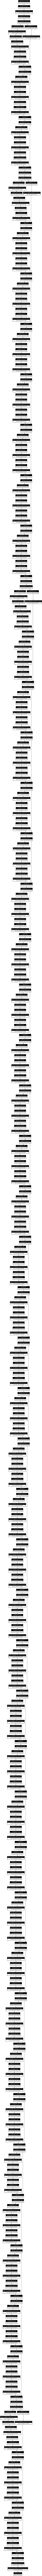

In [20]:
#now we alos plot the model
from keras.utils import plot_model
plot_model(resnet152_dilated,show_shapes=True,show_layer_names=True)


In [ ]:
#now after plotting the model and readying the model , we need to compile the model

import tensorflow as tf

# Define custom metrics
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

# F1-score can be calculated using precision and recall, but we can also use a custom metric
def f1_score(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * ((prec * rec) / (prec + rec + tf.keras.backend.epsilon()))

# Compile the model
resnet152_dilated.compile(optimizer="Adam",
                  loss='categorical_crossentropy',
                  metrics=['accuracy', precision, recall, f1_score],
                  run_eagerly=True)




#now we fit into the model
resnet152_dilated.fit(x_train_image,y_labels,batch_size=20,verbose=1)

In [ ]:
#after fitting the model we also need to evaluate the model
resnet152_dilated.evaluate(x_test_file,y_labels_test,verbose=1)
#we have evaluated our model
